### Package/Library Imports

In [56]:
from config import API_KEY # import API_KEY from config file

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests 
import pandas as pd 
from io import StringIO

### Read data using API

In [57]:
# **Preferred Method**: Export Endpoint

#Function to collect data 
def collect_data(dataset_id):
    base_url = 'https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/'
    dataset_id = dataset_id
    format = 'csv'

    url = f'{base_url}{dataset_id}/exports/{format}'
    params = {
    'select': '*',
    'limit': -1, # all records
    'lang': 'en',
    'timezone': 'UTC',
    'api_key': API_KEY #use if use datasets require API key permissions
    }

    # GET request
    response = requests.get(url, params=params)
    if response.status_code == 200:
        # StringIO to read the CSV data
        url_content = response.content.decode('utf-8')
        dataset = pd.read_csv(StringIO(url_content), delimiter=';')
        return dataset 
    else:
        print(f'Request failed with status code {response.status_code}')

# Read data using the function
cafe_df = collect_data('cafes-and-restaurants-with-seating-capacity')
emp_block_df = collect_data('employment-by-block-by-clue-industry')
block_df = collect_data('blocks-for-census-of-land-use-and-employment-clue')

### Learn and explore the data

#### Cafes/Restaurants with seating capacity

In [58]:
print(f'Shape of the cafe_df:\t{cafe_df.shape}')
cafe_df.head(5)

Shape of the cafe_df:	(60055, 15)


,census_year,block_id,property_id,base_property_id,building_address,clue_small_area,trading_name,business_address,industry_anzsic4_code,industry_anzsic4_description,seating_type,number_of_seats,longitude,latitude,location
0,2017,6,578324,573333,2 Swanston Street MELBOURNE 3000,Melbourne (CBD),Transport Hotel,"Tenancy 29, Ground , 2 Swanston Street MELBOUR...",4520,"Pubs, Taverns and Bars",Seats - Indoor,230,144.969942,-37.817778,"-37.817777826050005, 144.96994164279243"
1,2017,6,578324,573333,2 Swanston Street MELBOURNE 3000,Melbourne (CBD),Transport Hotel,"Tenancy 29, Ground , 2 Swanston Street MELBOUR...",4520,"Pubs, Taverns and Bars",Seats - Outdoor,120,144.969942,-37.817778,"-37.817777826050005, 144.96994164279243"
2,2017,11,103957,103957,517-537 Flinders Lane MELBOURNE 3000,Melbourne (CBD),Altius Coffee Brewers,"Shop , Ground , 517 Flinders Lane MELBOURNE 3000",4512,Takeaway Food Services,Seats - Outdoor,4,144.956486,-37.819875,"-37.819875445799994, 144.95648638781466"
3,2017,11,103957,103957,517-537 Flinders Lane MELBOURNE 3000,Melbourne (CBD),Five & Dime Bagel,16 Flinders Lane MELBOURNE 3000,1174,Bakery Product Manufacturing (Non-factory based),Seats - Indoor,14,144.956486,-37.819875,"-37.819875445799994, 144.95648638781466"
4,2017,11,103985,103985,562-564 Flinders Street MELBOURNE 3000,Melbourne (CBD),YHA Melbourne Central,562-564 Flinders Street MELBOURNE 3000,4400,Accommodation,Seats - Indoor,43,144.955635,-37.820595,"-37.82059511593975, 144.9556348088"


In [59]:
print('-'*20,'cafe_df Info','-'*20)
print()
# display all columns, non-null count and their data types
print(cafe_df.info())

-------------------- cafe_df Info --------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60055 entries, 0 to 60054
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   census_year                   60055 non-null  int64  
 1   block_id                      60055 non-null  int64  
 2   property_id                   60055 non-null  int64  
 3   base_property_id              60055 non-null  int64  
 4   building_address              60055 non-null  object 
 5   clue_small_area               60055 non-null  object 
 6   trading_name                  60055 non-null  object 
 7   business_address              60055 non-null  object 
 8   industry_anzsic4_code         60055 non-null  int64  
 9   industry_anzsic4_description  60055 non-null  object 
 10  seating_type                  60055 non-null  object 
 11  number_of_seats               60055 non-null  int64  
 12  long

According to the above output there are number of null values in the cafe_df need to be addressed.

#### Employment by block

In [60]:
print(f'Shape of the emp_block_df:\t{emp_block_df.shape}')
emp_block_df.head(5)

Shape of the emp_block_df:	(12394, 24)


,census_year,block_id,clue_small_area,accommodation,admin_and_support_services,agriculture_and_mining,arts_and_recreation_services,business_services,construction,education_and_training,...,information_media_and_telecommunications,manufacturing,other_services,public_administration_and_safety,real_estate_services,rental_and_hiring_services,retail_trade,transport_postal_and_storage,wholesale_trade,total_jobs_in_block
0,2022,4,Melbourne (CBD),0.0,0.0,0.0,362.0,0.0,0.0,NaN,...,0.0,0.0,NaN,0.0,0.0,0.0,38.0,368.0,0.0,1008.0
1,2022,5,Melbourne (CBD),0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2022,6,Melbourne (CBD),0.0,0.0,0.0,203.0,0.0,0.0,0.0,...,NaN,0.0,NaN,0.0,NaN,0.0,47.0,0.0,0.0,647.0
3,2022,13,Melbourne (CBD),NaN,520.0,0.0,NaN,496.0,NaN,NaN,...,55.0,NaN,27.0,0.0,0.0,0.0,NaN,NaN,0.0,2379.0
4,2022,16,Melbourne (CBD),NaN,NaN,0.0,86.0,382.0,295.0,NaN,...,0.0,0.0,64.0,0.0,NaN,0.0,60.0,0.0,0.0,2404.0


In [61]:
print('-'*20,'emp_block_df Info','-'*20)
print()
# display all columns, non-null count and their data types
print(emp_block_df.info())

-------------------- emp_block_df Info --------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12394 entries, 0 to 12393
Data columns (total 24 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   census_year                               12394 non-null  int64  
 1   block_id                                  12394 non-null  int64  
 2   clue_small_area                           12394 non-null  object 
 3   accommodation                             9986 non-null   float64
 4   admin_and_support_services                10375 non-null  float64
 5   agriculture_and_mining                    11795 non-null  float64
 6   arts_and_recreation_services              8467 non-null   float64
 7   business_services                         10519 non-null  float64
 8   construction                              10319 non-null  float64
 9   education_and_training                    98

According to the above output there are number of null values in the emp_block_df need to be addressed.

#### Blocks info

In [62]:
print(f'Shape of the block_df:\t{block_df.shape}')
block_df.head(5)

Shape of the block_df:	(606, 4)


,geo_point_2d,geo_shape,block_id,clue_area
0,"-37.82296169692379, 144.95049282288122","{""coordinates"": [[[144.9479230372, -37.8233694...",1112,Docklands
1,"-37.78537422996195, 144.94085920366408","{""coordinates"": [[[144.9426153438, -37.7866287...",927,Parkville
2,"-37.777687358375964, 144.94600024715058","{""coordinates"": [[[144.9425926939, -37.7787229...",929,Parkville
3,"-37.796701447217345, 144.94361235073427","{""coordinates"": [[[144.9447165759, -37.7961286...",318,North Melbourne
4,"-37.79293972627454, 144.94371829763847","{""coordinates"": [[[144.9453910459, -37.7925266...",302,North Melbourne


In [63]:
print('-'*20,'block_df Info','-'*20)
print()
# display all columns, non-null count and their data types
print(block_df.info())

-------------------- block_df Info --------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606 entries, 0 to 605
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   geo_point_2d  606 non-null    object
 1   geo_shape     606 non-null    object
 2   block_id      606 non-null    int64 
 3   clue_area     606 non-null    object
dtypes: int64(1), object(3)
memory usage: 19.1+ KB
None


According to the above output there is no missing values in the block_df.

### Data Preprocessing

#### Cafes/Restaurants with seating capacity

In [64]:
print('-'*20,'cafe_df missing values','-'*20)
print()
missing_values = cafe_df.isnull().sum()
print(missing_values[missing_values > 0])

-------------------- cafe_df missing values --------------------

longitude    527
latitude     527
location     527
dtype: int64


Based on the above output, the cafe_df contains missing values in the longitude, latitude, and location columns. It is not appropriate to impute these missing values using simple aggregate functions such as mean or median, as these columns represent critical geographical data. 

Additionally, we cannot drop these records at this stage because we are working with three datasets, and these records may still be valuable when we merge them together later. 

#### Employment by block

In [65]:
print('-'*20,'emp_block_df missing values','-'*20)
print()
missing_values = emp_block_df.isnull().sum()
print(missing_values[missing_values > 0])

-------------------- emp_block_df missing values --------------------

accommodation                               2408
admin_and_support_services                  2019
agriculture_and_mining                       599
arts_and_recreation_services                3927
business_services                           1875
construction                                2075
education_and_training                      2553
electricity_gas_water_and_waste_services    2468
finance_and_insurance                       1578
food_and_beverage_services                  2628
health_care_and_social_assistance           2560
information_media_and_telecommunications    2298
manufacturing                               2309
other_services                              3280
public_administration_and_safety            1852
real_estate_services                        1791
rental_and_hiring_services                   860
retail_trade                                2510
transport_postal_and_storage                224

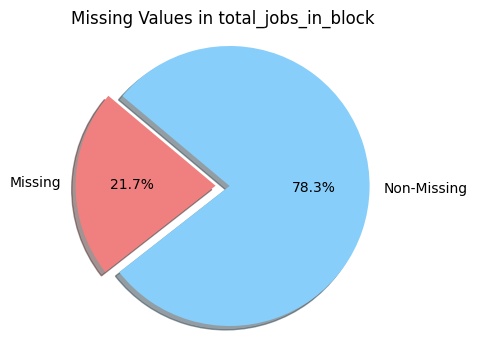

In [71]:
# Step 1: Count missing and non-missing values
missing_total_jobs_count = emp_block_df['total_jobs_in_block'].isnull().sum()
non_missing_total_jobs_count = emp_block_df['total_jobs_in_block'].notnull().sum()

# Create a dictionary for the counts
missing_data = {
    'Missing': missing_total_jobs_count,
    'Non-Missing': non_missing_total_jobs_count
}

# Step 2: Create a pie chart
labels = list(missing_data.keys())
sizes = list(missing_data.values())
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)  # explode the slice for missing values

plt.figure(figsize=(4, 4))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Missing Values in total_jobs_in_block')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the pie chart
plt.show()

The above figure illustrates that approximately 21.7% of the values in the total_jobs_in_block column are missing. This is a significant issue that we need to handle properly. Because total number of jobs in each block is a key fact analyzing the hot spot for restaurants. otherwise, it could mislead the findings. 

The presence of such a substantial portion of missing data can introduce bias, lead to loss of information, and affect the accuracy and reliability of our analysis. Therefore, careful consideration and appropriate imputation methods are necessary to address this issue

In [67]:
# Filter the rows where total_jobs_in_block is missing
missing_total_jobs = emp_block_df[emp_block_df['total_jobs_in_block'].isnull()]

# Get the count of unique block IDs with missing total_jobs_in_block
unique_block_ids_count = missing_total_jobs['block_id'].nunique()

print(f"Number of unique block IDs with missing total_jobs_in_block: {unique_block_ids_count}")


Number of unique block IDs with missing total_jobs_in_block: 207


In [68]:
# Get the count of unique block IDs in the entire dataset
unique_block_ids_total = emp_block_df['block_id'].nunique()

print(f"Number of unique block IDs in the entire dataset: {unique_block_ids_total}")


Number of unique block IDs in the entire dataset: 607


Impute missing values in total_jobs_in_block column, by the mean of related block_id group. Still need to improve this metod.

WIP . . .

In [69]:
# Calculate the mean of total jobs in each block
block_mean_jobs = emp_block_df.groupby('block_id')['total_jobs_in_block'].transform('mean')

# Create a new column for the imputed total jobs in block
emp_block_df['total_jobs_in_block_imputed'] = emp_block_df.apply(
    lambda row: row['total_jobs_in_block'] if pd.notnull(row['total_jobs_in_block']) and row['total_jobs_in_block'] != 0
    else block_mean_jobs[row.name],
    axis=1
)

print(emp_block_df.head())

   census_year  block_id  clue_small_area  accommodation  \
0         2022         4  Melbourne (CBD)            0.0   
1         2022         5  Melbourne (CBD)            0.0   
2         2022         6  Melbourne (CBD)            0.0   
3         2022        13  Melbourne (CBD)            NaN   
4         2022        16  Melbourne (CBD)            NaN   

   admin_and_support_services  agriculture_and_mining  \
0                         0.0                     0.0   
1                         0.0                     0.0   
2                         0.0                     0.0   
3                       520.0                     0.0   
4                         NaN                     0.0   

   arts_and_recreation_services  business_services  construction  \
0                         362.0                0.0           0.0   
1                           0.0                0.0           0.0   
2                         203.0                0.0           0.0   
3                       